<a href="https://colab.research.google.com/github/sathwikareddy1/DA-using-python/blob/main/DAUP_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sumanthvrao/daily-climate-time-series-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sumanthvrao/daily-climate-time-series-data/versions/3


In [ ]:
!ls "/root/.cache/kagglehub/datasets/sumanthvrao/daily-climate-time-series-data/versions/3"

DailyDelhiClimateTest.csv  DailyDelhiClimateTrain.csv


In [ ]:
import pandas as pd
data = pd.read_csv(f"/root/.cache/kagglehub/datasets/sumanthvrao/daily-climate-time-series-data/versions/3/DailyDelhiClimateTrain.csv")
print(data.info())
print(data.head())
print(data.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None
         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000
date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object


In [ ]:
print(data.isnull().sum())

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [ ]:
data.fillna(method='ffill', inplace=True)

<ipython-input-44-519281724d28>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
key_stats = data[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].describe()

median_stats = data[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].median()

print(key_stats)

print("\nMedian for Each Column:")
print(median_stats)


          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333

Median for Each Column:
meantemp          27.714286
humidity          62.625000
wind_speed         6.221667
meanpressure    1008.563492
dtype: float64


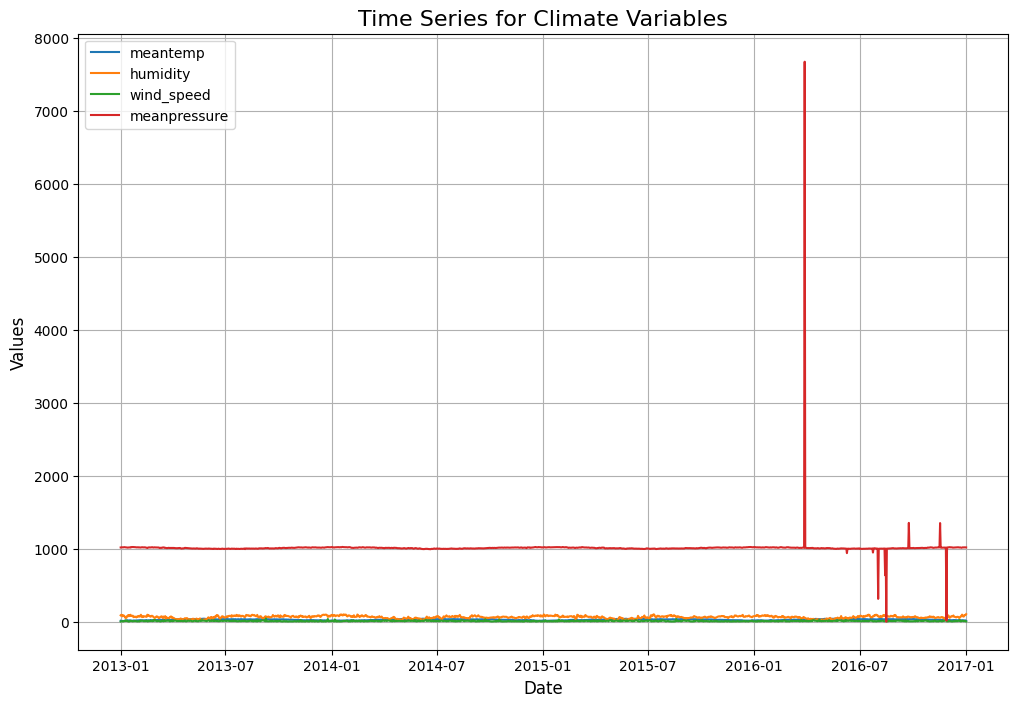

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for column in ['meantemp', 'humidity', 'wind_speed', 'meanpressure']:
    plt.plot(data.index, data[column], label=column)

plt.title("Time Series for Climate Variables", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.legend(loc="upper left", fontsize=10)
plt.grid()
plt.show()


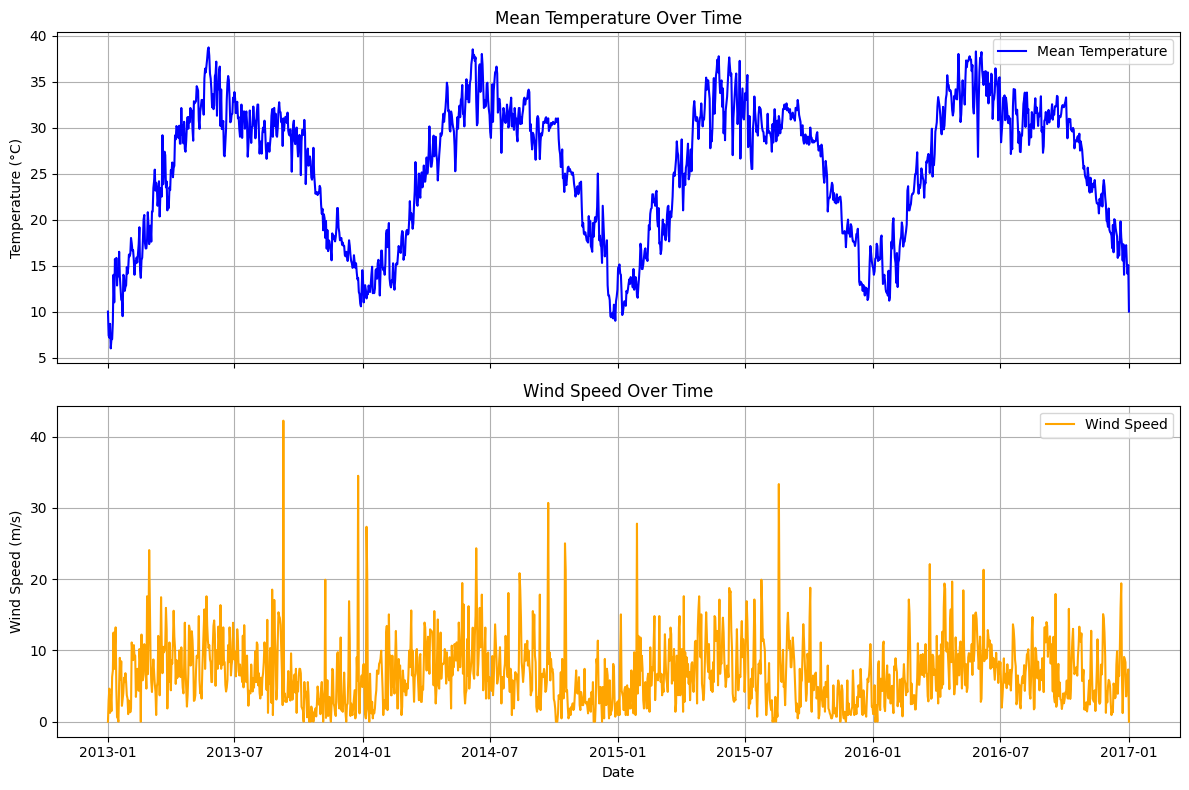

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

axs[0].plot(data.index, data['meantemp'], label='Mean Temperature', color='blue')
axs[0].set_title("Mean Temperature Over Time")
axs[0].set_ylabel("Temperature (°C)")
axs[0].legend()
axs[0].grid()

axs[1].plot(data.index, data['wind_speed'], label='Wind Speed', color='orange')
axs[1].set_title("Wind Speed Over Time")
axs[1].set_ylabel("Wind Speed (m/s)")
axs[1].legend()
axs[1].grid()

plt.xlabel("Date")
plt.tight_layout()
plt.show()


<Figure size 1200x1000 with 0 Axes>

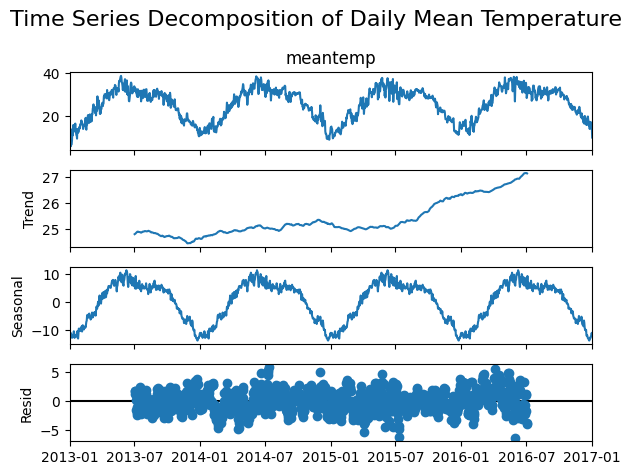

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomposition = seasonal_decompose(data['meantemp'], model='additive', period=365)

plt.figure(figsize=(12, 10))
decomposition.plot()
plt.suptitle("Time Series Decomposition of Daily Mean Temperature", fontsize=16)
plt.tight_layout()
plt.show()


<Figure size 1200x1000 with 0 Axes>

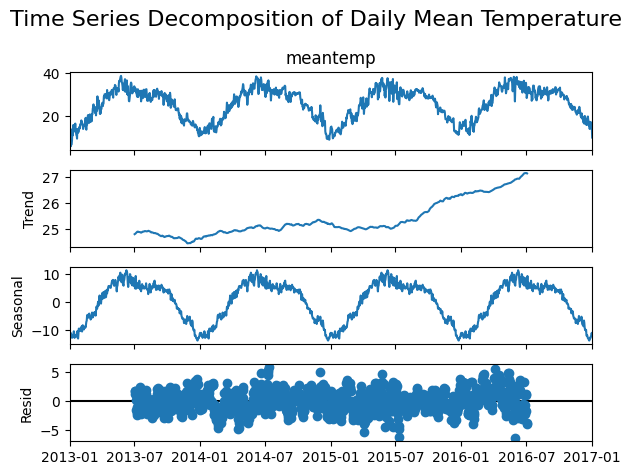

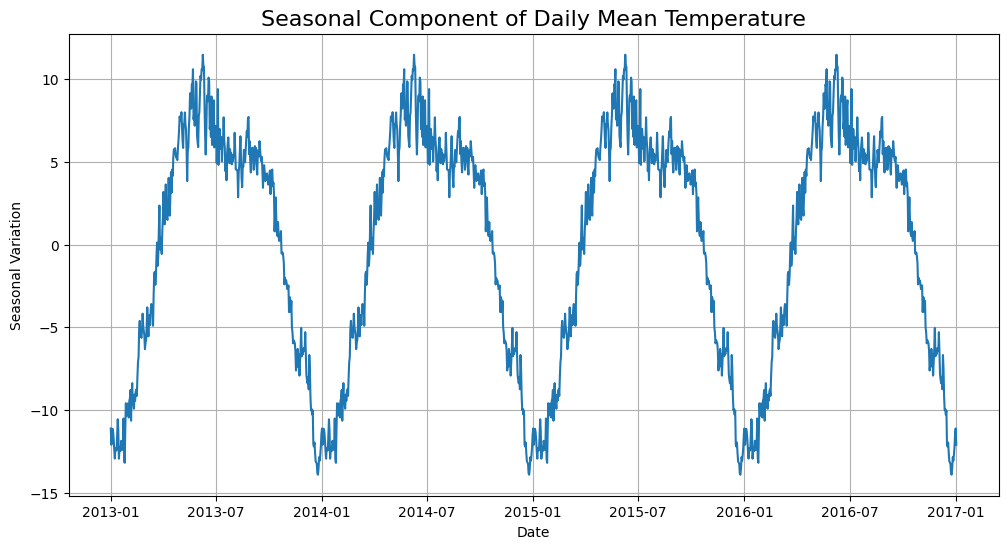

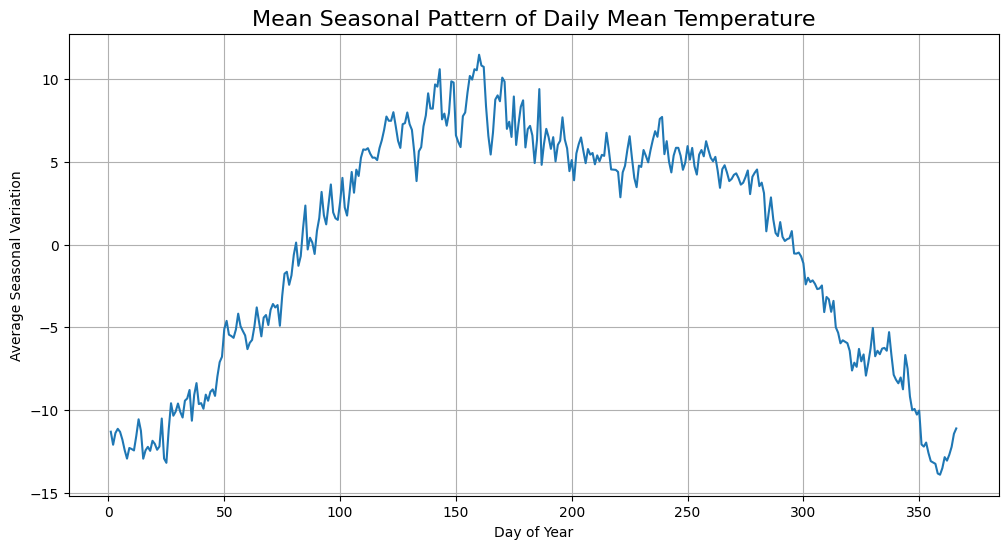

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomposition = seasonal_decompose(data['meantemp'], model='additive', period=365)

plt.figure(figsize=(12, 10))
decomposition.plot()
plt.suptitle("Time Series Decomposition of Daily Mean Temperature", fontsize=16)
plt.tight_layout()
plt.show()

seasonal_component = decomposition.seasonal

plt.figure(figsize=(12, 6))
plt.plot(seasonal_component)
plt.title("Seasonal Component of Daily Mean Temperature", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Seasonal Variation")
plt.grid(True)
plt.show()

mean_seasonal_pattern = seasonal_component.groupby(seasonal_component.index.dayofyear).mean()

plt.figure(figsize=(12, 6))
plt.plot(mean_seasonal_pattern)
plt.title("Mean Seasonal Pattern of Daily Mean Temperature", fontsize=16)
plt.xlabel("Day of Year")
plt.ylabel("Average Seasonal Variation")
plt.grid(True)
plt.show()


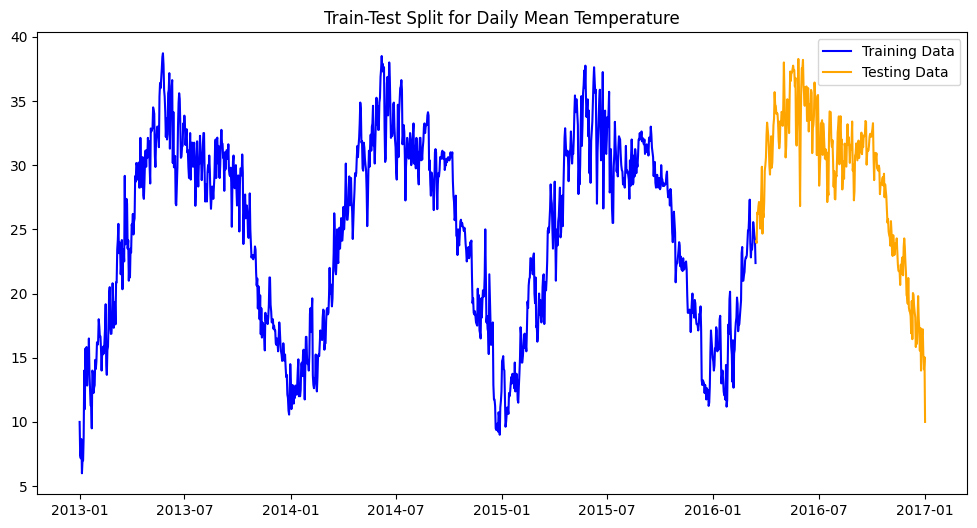

In [ ]:
train = data['meantemp'][:int(0.8 * len(data))]
test = data['meantemp'][int(0.8 * len(data)):]

plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data', color='blue')
plt.plot(test, label='Testing Data', color='orange')
plt.title("Train-Test Split for Daily Mean Temperature")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


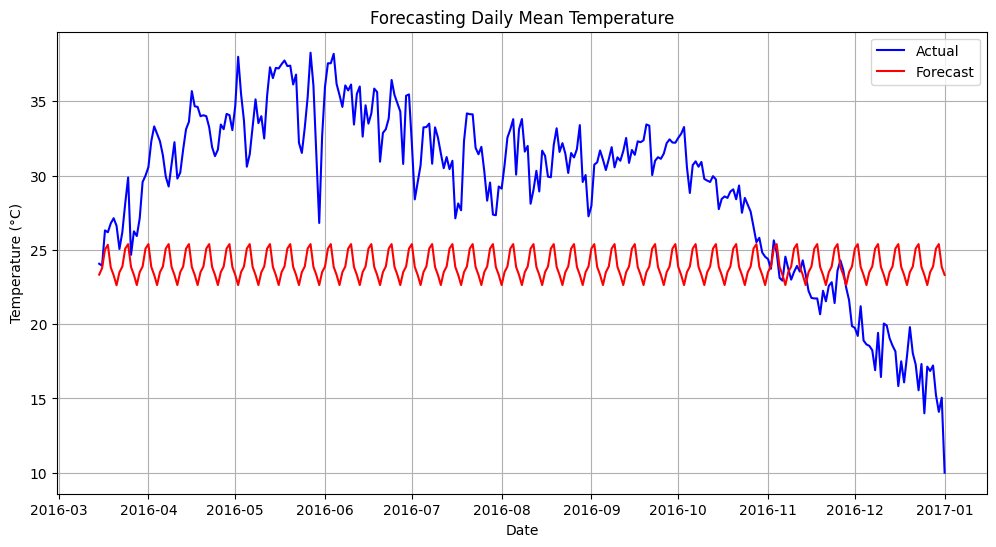

In [ ]:
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA

stl = STLForecast(train, ARIMA, model_kwargs={"order": (1, 1, 1)})
stl_fit = stl.fit()

forecast = stl_fit.forecast(steps=len(test))

plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label="Actual", color='blue')
plt.plot(test.index, forecast, label="Forecast", color='red')
plt.title("Forecasting Daily Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 6.95816578506543
Root Mean Squared Error (RMSE): 7.783465088363324


In [ ]:
print(data.index)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='date', length=1462, freq=None)
